# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

# Описание проекта:
Приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты

## Часть 1. Приоритизация гипотез

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
import pathlib
from pathlib import Path


hypothesis = pd.read_csv('/datasets/hypothesis.csv')


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Вывод:  

В таблице 5 столбцов, 9 строк.  
Типы столбцов соответствуют.    
Пропусков нет.  
Наименования столбцов и приведем к нижнему регистру

In [2]:
hypothesis = hypothesis.rename(columns={'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Вывод:  
Проблем с данными нет, данные готовы к анализу.

### Применяем фреймворк ICE для приоритизации

In [3]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round().astype('int')
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(4))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8


### Применяем фреймворк RICE для приоритизации

In [4]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round().astype('int')
display(hypothesis[['hypothesis', 'rice', 'ice']].sort_values(by=['rice', 'ice'], ascending=False).head(4))

,hypothesis,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8


Вывод:  
применив два фреймворка ICE и RICE для приоритизации гипотез, получили разные четверки.  
В этих четверках есть только две повторяющиеся гипотезы, с индексом 7:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

и 6:

"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"

RICE в дополнение к ICE учитывает еще и охват пользователей.  
Поэтому на первое место выходит гипотеза с индексом 7:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
,  
так как имеет больше охват пользователей  
(10 по сравнению с 5).
 

## Часть 2. Анализ A/B-теста

### Загрузка данных и подготовка их к анализу

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())
orders.info()
print()
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Вывод:  
1. orders
В таблице 5 столбцов, 1197 строк.  
Тип  столбца с датой - object изменим на datetime64.    
Пропусков нет.
2. visitors
В таблице 3 столбца, 62 строки.  
Тип  столбца с датой - object изменим на datetime64.    
Пропусков нет.

In [6]:
orders = orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId', 'date':'date', 'revenue':'revenue', 'group':'group'})
#display(orders.head())
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head())
orders.info()
print()
display(visitors.head())
visitors.info()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
orderId    1197 non-null int64
userId     1197 non-null int64
date       1197 non-null datetime64[ns]
revenue    1197 non-null int64
group      1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Вывод:  
Проблем с данными нет, данные готовы к анализу.  
Кол-во пользователей, состоящих в двух группах: 58      
Всего уникальных пользователей в тесте: 1031      
% кол-ва пользователей, состоящих в двух группах к общему кол-ву пользователей: 5.63    

In [7]:
users = orders.groupby('userId').nunique()  
display(users)
users1 = users['group']
#display(users1)
total = 0
for element in users1:
    if element > 1:
        total += 1
print('Кол-во пользователей, состоящих в двух группах: {}'.format(total))
print('Всего уникальных пользователей в тесте:', len(users))
print('% кол-ва пользователей, состоящих в двух группах к общему кол-ву пользователей: {:.2f}'.format(58/1031*100))


,orderId,userId,date,revenue,group
userId,,,,,
5114589,1,1,1,1,1
6958315,1,1,1,1,1
8300375,2,1,2,2,2
11685486,1,1,1,1,1
39475350,1,1,1,1,1
...,...,...,...,...,...
4266935830,2,1,1,1,2
4278982564,1,1,1,1,1
4279090005,1,1,1,1,1


Кол-во пользователей, состоящих в двух группах: 58
Всего уникальных пользователей в тесте: 1031
% кол-ва пользователей, состоящих в двух группах к общему кол-ву пользователей: 5.63


#### Строим график кумулятивной выручки по группам. Делаем выводы и предположения

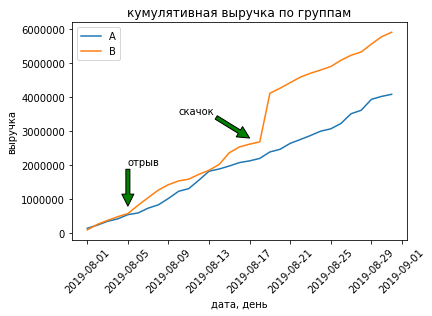

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max',
            'group': 'max',
            'orderId': pd.Series.nunique,
            'userId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.xticks(rotation=45)

plt.legend()
plt.title("кумулятивная выручка по группам")
plt.ylabel("выручка")
plt.xlabel("дата, день")
plt.show()

Вывод:  
Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов,  
либо о появлении очень дорогих заказов в выборке.

#### Строим график кумулятивного среднего чека по группам. Делаем выводы и предположения

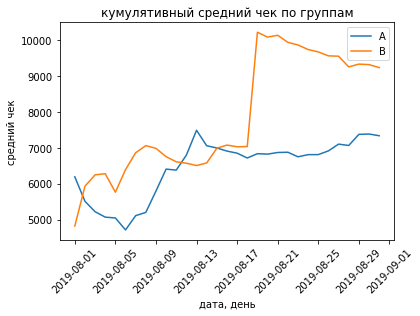

In [9]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title("кумулятивный средний чек по группам")
plt.ylabel("средний чек")
plt.xlabel("дата, день")
plt.xticks(rotation=45)
plt.show()

Вывод:  
кумулятивное значение среднего чека по сегментам продолжает колебаться.  
Скорее всего принимать решение по этой метрике рано.  
Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

#### Строим график относительного изменения кумулятивного среднего чека группы B к группе A. Делаем выводы и предположения

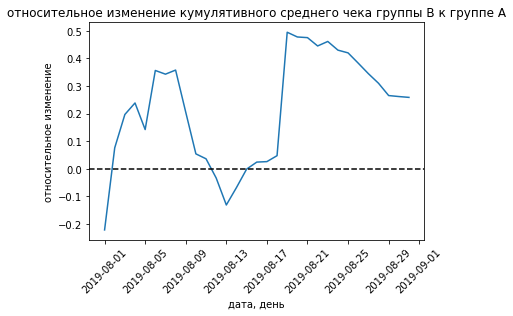

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("дата, день")
plt.ylabel("относительное изменение")
plt.xticks(rotation=45)
plt.show()

#display(mergedCumulativeRevenue['date'].min())
#display(mergedCumulativeRevenue['date'].max())

Вывод:  
результаты теста значительно и резко менялись в несколько дат.  
Видимо, именно тогда были совершены аномальные заказы.

#### Строим график кумулятивной конверсии по группам. Делаем выводы и предположения

['2019-08-01', '2019-08-31', 0, 0.041]

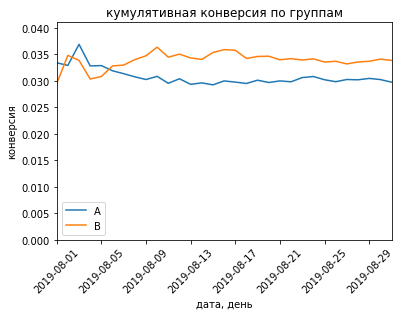

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("кумулятивная конверсия по группам")
plt.xlabel("дата, день")
plt.ylabel("конверсия")
plt.xticks(rotation=45)

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.041]) 

Вывод:  
Симметричный график получился. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Строим график относительного изменения кумулятивной конверсии группы B к группе A. Делаем выводы и предположения

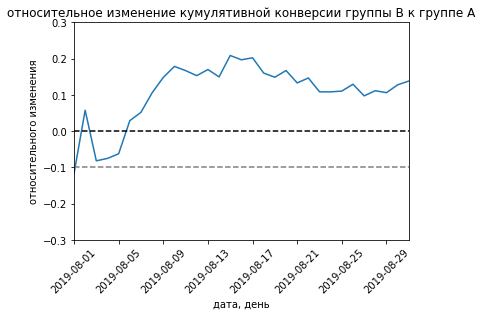

In [12]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
#plt.legend()
plt.title("относительное изменение кумулятивной конверсии группы B к группе A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
plt.xlabel("дата, день")
plt.ylabel("относительного изменения")
plt.xticks(rotation=45)
plt.show()

Вывод:  
В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, потом росла.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину

#### Строим точечный график количества заказов по пользователям. Делаем выводы и предположения

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


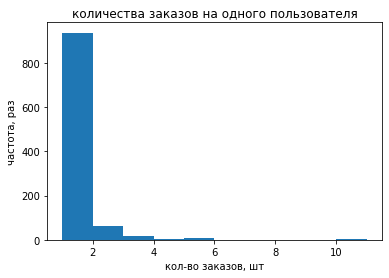

Text(0, 0.5, 'кол-во заказов, шт')

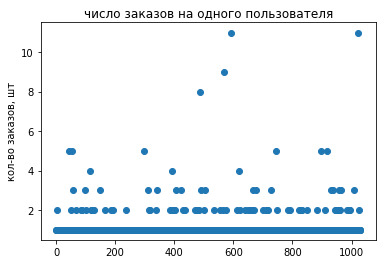

In [13]:
#Подсчитаем количество заказов по пользователям:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
#Есть пользователи, которые совершали 5, 8, 9 и 11 заказов.
#Значительно больше, чем обычный пользователь за неделю.

#Построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders'])
plt.title("количества заказов на одного пользователя")
plt.xlabel("кол-во заказов, шт")
plt.ylabel("частота, раз")
plt.show()
#Большинство покупателей заказывали только один раз.
#Однако доля пользователей с 2-4 заказами тоже значительна

#Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("число заказов на одного пользователя")
plt.ylabel("кол-во заказов, шт")

Выводы подтверждаются: много пользователей с 2-4 заказами.  
Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### Считаем 95-й и 99-й перцентили количества заказов на пользователя. Выбераем границу для определения аномальных пользователей

In [14]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([2., 4.])

Вывод: 
Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 заказов.
Выбираем границу (тех аномальных пользователей), кто сделал 4 и более заказов на одного пользователя.

#### Строим точечный график стоимостей заказов. Делаем выводы и предположения

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


50

1294500

8348.005847953216

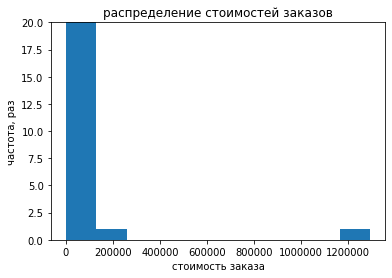

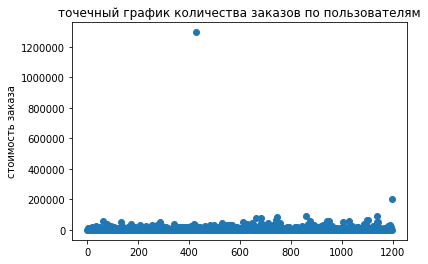

In [15]:
display(orders.head(10))
display(orders['revenue'].min())
display(orders['revenue'].max())
display(orders['revenue'].mean())

#Изучим гистограмму распределения стоимостей заказов:
plt.hist(orders['revenue'])
plt.title("распределение стоимостей заказов")
plt.xlabel("стоимость заказа")
plt.ylabel("частота, раз")
plt.ylim([0, 20])
#plt.xlim([0, 50])
plt.show()



x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("точечный график количества заказов по пользователям")
plt.ylabel("стоимость заказа")
plt.show()

Вывод:  
минимальная стоимость заказа - 50  
максимальная - 1 294 500 
По графику видно, что есть немного дорогих заказов (1 294 500 и около 200 000).  
Можно выбрать границу аномальных заказов между 70 000 и 80 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Считаем 95-й и 99-й перцентили стоимости заказов. Выбераем границу для определения аномальных заказов

In [16]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Вывод: 
Не более 5% заказов дороже 28000 и не более 1% дороже 58233.2.
Выбираем границу - сумма заказа свыше 30000.

#### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным. Делаем выводы и предположения

Нулевая гипотеза: статистические значимые различия отсутствуют    
Обратная гипотеза: статистические значимые различия есть  

In [17]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


0.017
0.138


Вывод:  
P-value меньше 0.05, поэтому нулевую гипотезу отвергаем (есть различия).  
Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия.
Относительный прирост конверсии группы В к конверсии группы А равен 13.8%

#### Считаем статистическую значимость различий в среднем чеке заказа по «сырым» данным. Делаем выводы и предположения

In [18]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Вывод:  
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие среднего чека между сегментами 25.9%

#### Считаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Делаем выводы и предположения

In [19]:
#Узнаем, сколько всего аномальных пользователей методом shape():
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('всего аномальных пользователей:', abnormalUsers.shape)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: userId, dtype: int64
всего аномальных пользователей: (53,)
0.019
0.144


Вывод:  
Результаты по конверсии практически не изменились.
P-value меньше 0.05, поэтому нулевую гипотезу отвергаем (есть различия).  
Анализ "очищенных данных" сообщает, что в конверсии между группами есть статистически значимые различия.
Относительный прирост конверсии группы В к конверсии группы А увеличился до 14.4%


#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Делаем выводы и предположения

In [20]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided')[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.979
-0.017


Вывод: 
после удаления выбросов P-value увеличился до 0.490, дисперсия снизилась с 25.9% почти до нуля



#### решение по результатам теста:

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий  

Как по сырым данным так и по очищенным нет статистически значимого различия по среднему чеку между группами.  

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения

График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя

Вывод:  
остановить тест и признать его успешным, победила группа В

## Общий вывод:  

Часть 1. Приоритизация гипотез:
применив два фреймворка ICE и RICE для приоритизации гипотез, получили разные четверки.  
В этих четверках есть только две повторяющиеся гипотезы,

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и  

"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"

RICE в дополнение к ICE учитывает еще и охват пользователей.  
Поэтому на первое место выходит гипотеза

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

так как имеет больше охват пользователей (максимальное значение по шкале 10).  

Часть 2. Анализ A/B-теста
остановить тест и признать его успешным, победила группа В